In [19]:
from matplotlib import pyplot as plt
import numpy as np
import tensorcircuit as tc
def R(t):
    return np.array([[np.cos(t),np.sin(t)],[-np.sin(t),np.cos(t)]])
from scipy import linalg

def I(n):
    return np.array([1 if i%(n+1)==0 else 0 for i in range(n*n)]).reshape(n,n)
def ZERO(n):
    return np.array([0 for i in range(n*n)]).reshape(n,n)
def _exp(mat,t):
    return np.cos(t)*I(mat.shape[0])+1j*np.sin(t)*mat;
def conj_tr(v):
    return np.conj(v.transpose())
def expect(mat,v):
    return np.matmul(np.matmul(conj_tr(v),mat),v)[0][0]


tx=np.array([[0,1],[1,0]])
ty=np.array([[0,-1j],[1j,0]])
tz=np.array([[1,0],[0,-1]])
v0=np.array([[1],[0]])
v1=np.array([[0],[1]])

def f(id1,id2):
    Mat=[I(2),tx,ty,tz]
    class test_1_helper:
        def __init__(self,p,q):
            self.P=p
            self.Q=q
        def __call__(self,t):
            vt=np.matmul(_exp(self.P,t/2),v0)
            return expect(self.Q,vt).real
    return test_1_helper(Mat[id1],Mat[id2])

def draw_function(f,s,t,point_num,avg=""):
    x_arr,y_arr=[],[]
    for i in range(point_num+1):
        v=s+(t-s)*1./point_num*i;
        x_arr.append(v)
        y_arr.append(f(v))
    plt.plot(x_arr,y_arr)
def draw_line(ax,ay,bx,by,avg=""):
    x_arr,y_arr=[ax,bx],[ay,by]
    plt.plot(x_arr,y_arr,avg)
    
def multi_kron(arr):
    ans=I(1)
    for i in arr:
        ans=np.kron(ans,i)
    return ans

### 1.2.5

In [6]:
print(1/np.sqrt(2)*(multi_kron([v0,v1,v0])-multi_kron([v1,v0,v1])))

[[ 0.        ]
 [ 0.        ]
 [ 0.70710678]
 [ 0.        ]
 [ 0.        ]
 [-0.70710678]
 [ 0.        ]
 [ 0.        ]]


### 1.3.1

In [12]:
def number_differential(f,x,delta):
    return (f(x+delta)-f(x))/delta

# sample
print(number_differential(np.sin,1,1e-6),np.cos(1),number_differential(np.sin,1,1e-6)-np.cos(1))

0.5403018851213304 0.5403023058681398 -4.2074680939307996e-07


### 1.3.2

$$
\begin{align}
f'(x)=&A\cos(x+B)=\dfrac{A\sin(x+\delta+B)-A\sin(x-\delta+B)}\tau\\
=&\dfrac{2A\cos (x+B)\sin \delta}\tau\Rightarrow\\
\tau=&2\sin\delta\\
f'(x)=&\dfrac{A\sin(x+\delta+B)-A\sin(x-\delta+B)}{2\sin\delta}=\dfrac{f(x+\delta)-f(x-\delta)}{2\sin\delta}\\
\end{align}
$$

In [15]:
def sin_differential(x,A,B,delta=1):
    t=np.sin(delta)*2
    return (A*np.cos(x+B),(A*np.sin(x+delta+B)-A*np.sin(x-delta+B))/t)

# sample
print(sin_differential(1,2,3))

(-1.3072872417272239, -1.3072872417272239)


### 1.3.3

不难发现，$f=A\sin(x+B)$，其中$A=\{0,1\}$，所以：

$$
f'(x)=\dfrac{f(x+1)-f(x-1)}{2\sin 1}
$$

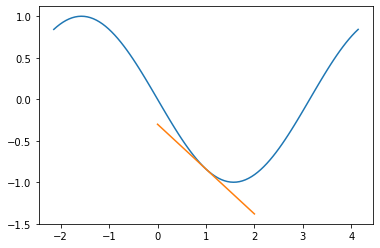

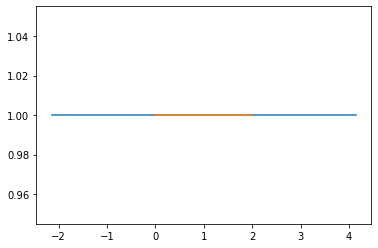

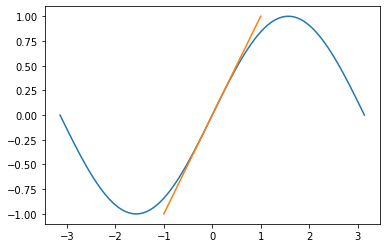

In [22]:
def f_differential(id1,id2,x):
    t=np.sin(1)*2
    F=f(id1,id2)
    return (F(x+1)-F(x-1))/t

def check(id1,id2,x):
    F=f(id1,id2)
    y=F(x)
    dy=f_differential(id1,id2,x)
    plt.clf()
    draw_function(F,x-np.pi,x+np.pi,100)
    draw_line(x-1,y-dy,x+1,y+dy)
    plt.show()

# sample
check(2,1,1)
check(2,0,1)
check(1,2,0)